# Deep Dive on College Tuition Data

In [13]:
import numpy as np
import pandas as pd
import sklearn

## Data Exploration

In [48]:
# reading datasets
# link to data: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-03-10

tuitionCost = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv")
tuitionIncome = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv")
salaryPotential = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv")
historicalTuition = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv")
diversitySchool = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv")

### Tuition Cost Table

In [15]:
tuitionCost.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [19]:
# checking for NaN values

# need to fix these columns later
nanCols = tuitionCost.columns[tuitionCost.isna().any()].tolist()
print(nanCols)

tuitionCost.isna().sum()

['state', 'room_and_board']


name                       0
state                     52
state_code                 0
type                       0
degree_length              0
room_and_board          1094
in_state_tuition           0
in_state_total             0
out_of_state_tuition       0
out_of_state_total         0
dtype: int64

In [18]:
# checking places that don't have states
tuitionCost[tuitionCost['state'].isna()]

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
61,American Samoa Community College,NaN,AS,Public,2 Year,NaN,3700,3700,3700,3700
62,American University,NaN,DC,Private,4 Year,14880.0,48459,63339,48459,63339
63,American University of Puerto Rico,NaN,PR,Private,4 Year,NaN,6946,6946,6946,6946
124,Atlantic University College,NaN,PR,Private,4 Year,NaN,4525,4525,4525,4525
169,Bayamon Central University,NaN,PR,Private,4 Year,NaN,5775,5775,5775,5775
349,Caribbean University,NaN,PR,Private,4 Year,NaN,6570,6570,6570,6570
354,Carlos Albizu University: San Juan,NaN,PR,Private,4 Year,NaN,5912,5912,5912,5912
372,Catholic University of America,NaN,DC,Private,4 Year,14650.0,45804,60454,45804,60454
576,Columbia Central University: Yauco,NaN,PR,For Profit,2 Year,NaN,6420,6420,6420,6420
618,Conservatory of Music of Puerto Rico,NaN,PR,Public,4 Year,NaN,4000,4000,4000,4000


In [16]:
tuitionCost.describe()

,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
count,1879.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,10095.279936,16491.293643,22871.727884,20532.725193,26913.159435
std,3288.547433,14773.839766,18948.389585,13255.650353,17719.726189
min,30.000000,480.000000,962.000000,480.000000,1376.000000
25%,7935.000000,4890.000000,5802.000000,9552.000000,11196.000000
50%,10000.000000,10099.000000,17669.000000,17486.000000,23214.000000
75%,12424.500000,27124.000000,35960.000000,29208.000000,39054.000000
max,21300.000000,59985.000000,75003.000000,59985.000000,75003.000000


array([[<AxesSubplot:title={'center':'room_and_board'}>,
        <AxesSubplot:title={'center':'in_state_tuition'}>],
       [<AxesSubplot:title={'center':'in_state_total'}>,
        <AxesSubplot:title={'center':'out_of_state_tuition'}>],
       [<AxesSubplot:title={'center':'out_of_state_total'}>,
        <AxesSubplot:>]], dtype=object)

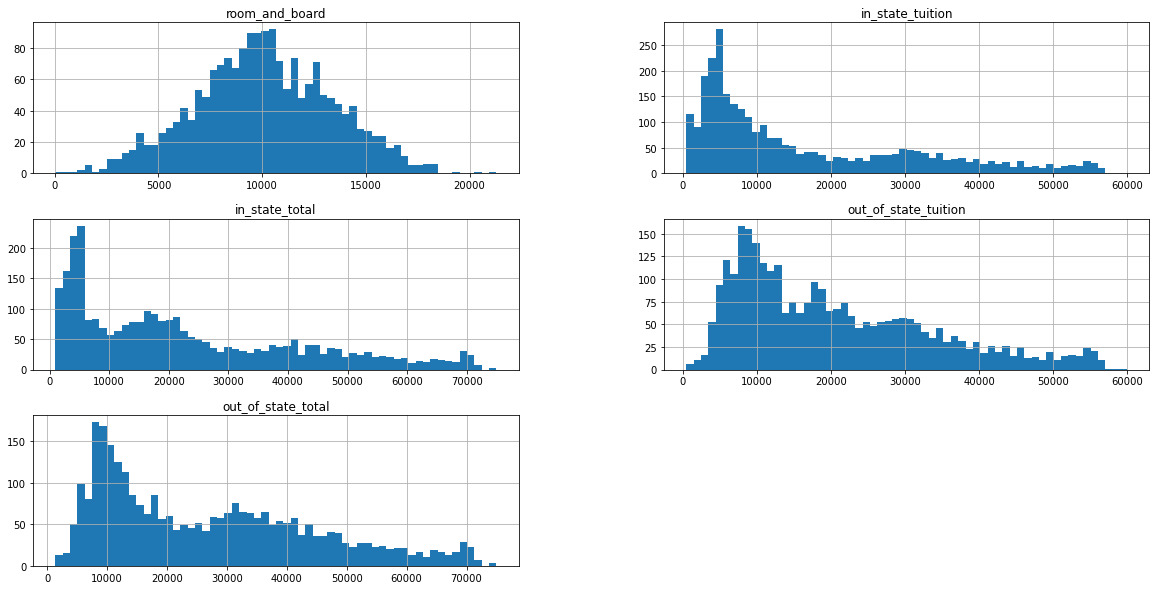

In [17]:
tuitionCost.hist(bins=60, figsize=(20, 10))

### Tuition Income Table

In [6]:
tuitionIncome.head()

,name,state,total_price,year,campus,net_cost,income_lvl
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000"
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000"
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000"
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000"
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000"


I might consider splitting the income_lvl column to something like income_lvl_min and income_lvl_max later.

In [22]:
tuitionIncome.isna().sum()

name           0
state          0
total_price    0
year           0
campus         0
net_cost       0
income_lvl     0
dtype: int64

There are no NaN values which is good.

In [23]:
tuitionIncome.describe()

,total_price,year,net_cost
count,209012.000000,209012.000000,209012.000000
mean,30102.192860,2014.379299,16784.924586
std,13824.702515,2.462371,8887.156533
min,4906.000000,2010.000000,-15101.000000
25%,19186.000000,2012.000000,10148.558640
50%,26286.000000,2014.000000,16207.099940
75%,38831.000000,2017.000000,22350.000000
max,114083.000000,2018.000000,95674.837700


array([[<AxesSubplot:title={'center':'net_cost'}>,
        <AxesSubplot:title={'center':'total_price'}>]], dtype=object)

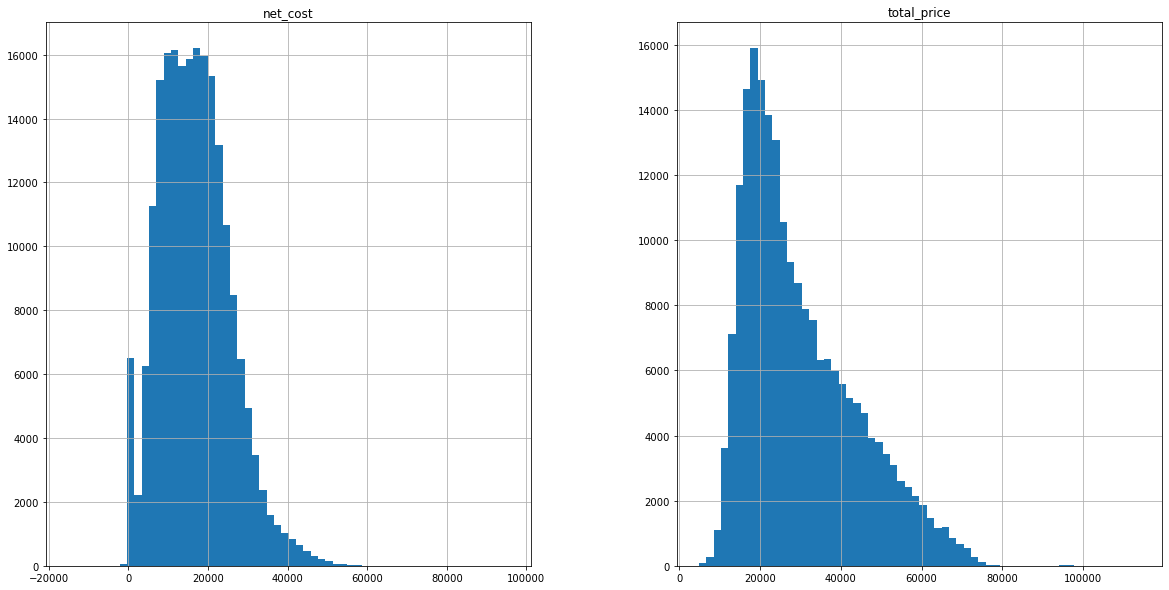

In [30]:
tuitionIncome[['net_cost', 'total_price']].hist(bins=60, figsize=(20,10))

### Salary Potential Table

In [7]:
salaryPotential.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [31]:
salaryPotential.isna().sum()

rank                          0
name                          0
state_name                    0
early_career_pay              0
mid_career_pay                0
make_world_better_percent    33
stem_percent                  0
dtype: int64

Let's check out the make_world_better_percent.

In [32]:
salaryPotential[salaryPotential['make_world_better_percent'].isna()]

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
23,24,Amridge University,Alabama,35700,65900,NaN,0
32,5,Arizona Christian University,Arizona,42600,76600,NaN,7
52,18,Central Baptist College,Arkansas,36900,68000,NaN,3
53,19,Philander Smith College,Arkansas,34600,61200,NaN,26
58,5,Charles R Drew University of Medicine and Science,California,78300,135700,NaN,3
97,19,Nazarene Bible College,Colorado,33600,60100,NaN,0
113,16,St Vincent's College,Connecticut,46800,87900,NaN,0
195,10,St. John's College-Department of Nursing,Illinois,55100,100000,NaN,0
207,22,Saint Francis Medical Center College of Nursing,Illinois,52800,90800,NaN,0
208,23,Methodist College,Illinois,51400,90500,NaN,0


The make_world_better_percent column is just the percent of alumni who think they are making the world a better place, so this column could probably be deleted.

In [33]:
salaryPotential.describe()

,rank,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
count,935.000000,935.000000,935.000000,902.000000,935.000000
mean,11.478075,51359.679144,92805.775401,53.878049,16.960428
std,7.074345,8365.505414,15856.480542,9.188770,15.398265
min,1.000000,32500.000000,60100.000000,33.000000,0.000000
25%,5.000000,46000.000000,81650.000000,48.000000,7.000000
50%,11.000000,50000.000000,89900.000000,52.000000,13.000000
75%,17.000000,55500.000000,100650.000000,58.000000,23.000000
max,25.000000,91200.000000,158200.000000,94.000000,100.000000


array([[<AxesSubplot:title={'center':'rank'}>,
        <AxesSubplot:title={'center':'early_career_pay'}>],
       [<AxesSubplot:title={'center':'mid_career_pay'}>,
        <AxesSubplot:title={'center':'make_world_better_percent'}>],
       [<AxesSubplot:title={'center':'stem_percent'}>, <AxesSubplot:>]],
      dtype=object)

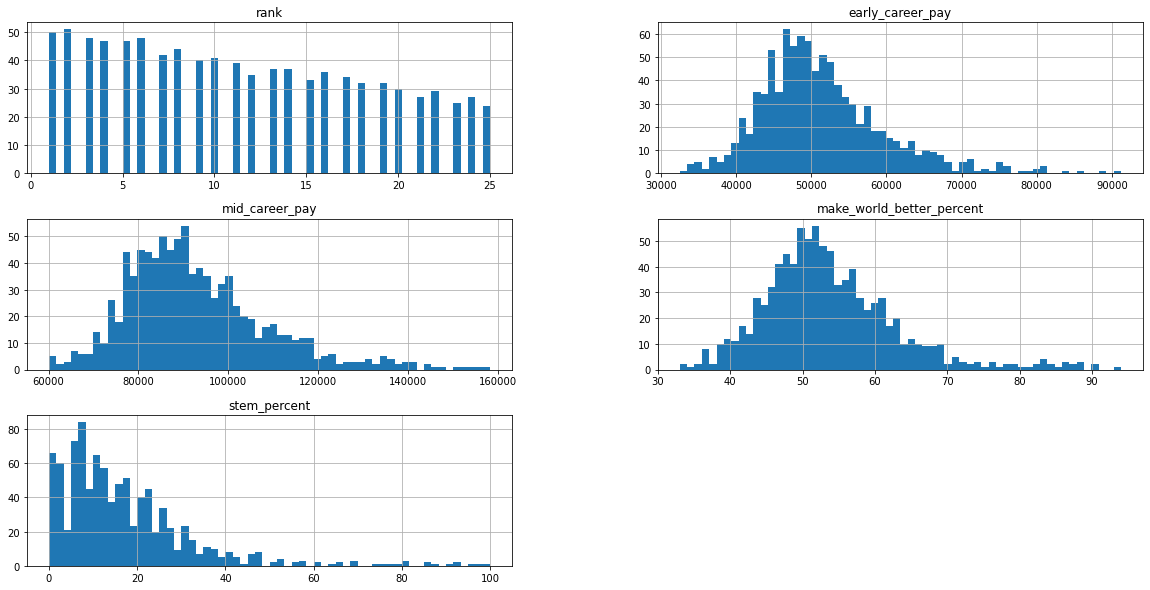

In [34]:
salaryPotential.hist(bins=60, figsize=(20, 10))

### Historical Tuition Table

In [8]:
historicalTuition.head()

,type,year,tuition_type,tuition_cost
0,All Institutions,1985-86,All Constant,10893
1,All Institutions,1985-86,4 Year Constant,12274
2,All Institutions,1985-86,2 Year Constant,7508
3,All Institutions,1985-86,All Current,4885
4,All Institutions,1985-86,4 Year Current,5504


In [35]:
historicalTuition.isna().sum()

type            0
year            0
tuition_type    0
tuition_cost    0
dtype: int64

No NaNs = good

In [36]:
# gonna check possible values
historicalTuition["year"].value_counts()

2016-17    18
2004-05    18
2014-15    18
1985-86    18
2002-03    18
2015-16    18
2013-14    18
2000-01    18
2005-06    18
2001-02    18
1995-96    18
2003-04    18
2012-13    12
2009-10    12
2011-12     6
2008-09     6
2007-08     6
2010-11     6
2006-07     6
Name: year, dtype: int64

In [37]:
historicalTuition["tuition_type"].value_counts()

4 Year Current     45
All Current        45
2 Year Constant    45
All Constant       45
4 Year Constant    45
2 Year Current     45
Name: tuition_type, dtype: int64

In [38]:
historicalTuition["type"].value_counts()

All Institutions    114
Public               78
Private              78
Name: type, dtype: int64

<AxesSubplot:>

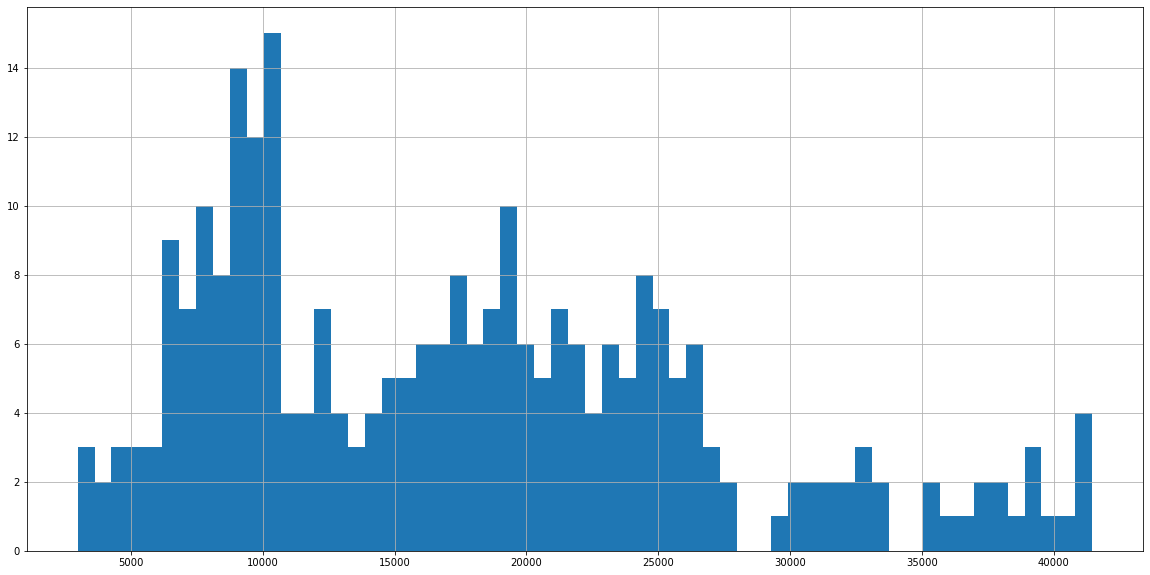

In [40]:
historicalTuition["tuition_cost"].hist(bins=60, figsize=(20,10))

### Diversity School Table

In [9]:
diversitySchool.head()

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984


In [41]:
diversitySchool.isna().sum()

name                341
total_enrollment      0
state               341
category              0
enrollment            0
dtype: int64

This is pretty similar to the tuition cost table

In [42]:
diversitySchool[diversitySchool["state"].isna()]

,name,total_enrollment,state,category,enrollment
935,NaN,30248,NaN,Women,15495
936,NaN,30248,NaN,American Indian / Alaska Native,277
937,NaN,30248,NaN,Asian,1176
938,NaN,30248,NaN,Black,644
939,NaN,30248,NaN,Hispanic,4596
...,...,...,...,...,...
50353,NaN,22,NaN,White,7
50354,NaN,22,NaN,Two Or More Races,1
50355,NaN,22,NaN,Unknown,1
50356,NaN,22,NaN,Non-Resident Foreign,0


We don't know the name or state of these schools, so we could consider taking these rows out.

In [43]:
diversitySchool.describe()

,total_enrollment,enrollment
count,50655.000000,50655.000000
mean,4386.690771,774.192794
std,8217.528150,2545.014538
min,1.000000,0.000000
25%,391.000000,6.000000
50%,1391.000000,59.000000
75%,4504.000000,379.000000
max,195059.000000,134722.000000


In [46]:
diversitySchool["state"].value_counts()

California        5027
New York          3344
Texas             2915
Pennsylvania      2739
Florida           2519
Ohio              2288
Illinois          1980
Virginia          1661
North Carolina    1639
Georgia           1408
Massachusetts     1364
Missouri          1276
Minnesota         1254
Michigan          1210
Tennessee         1155
Washington        1144
Colorado           990
Arizona            946
Wisconsin          946
Indiana            935
Kansas             924
Kentucky           814
Alabama            803
South Carolina     803
New Jersey         770
Iowa               726
Oklahoma           715
Louisiana          704
Oregon             693
Maryland           649
Arkansas           572
Connecticut        484
New Mexico         473
Nebraska           462
West Virginia      462
Mississippi        429
Maine              330
New Hampshire      286
Utah               275
South Dakota       264
Vermont            264
Nevada             264
Montana            242
Hawaii     

In [11]:
# looking at shapes
print("Tuition Cost: ", tuitionCost.shape)
print("Tuition Income: ", tuitionIncome.shape)
print("Salary Potential: ", salaryPotential.shape)
print("Historical Tuition: ", historicalTuition.shape)
print("Diversity School: ", diversitySchool.shape)

Tuition Cost:  (2973, 10)
Tuition Income:  (209012, 7)
Salary Potential:  (935, 7)
Historical Tuition:  (270, 4)
Diversity School:  (50655, 5)


## Data Cleaning

I'm gonna merge the tuition cost table and the diversity school table since they have common columns (name and state).

In [47]:
costDiversity = pd.merge(tuitionCost, diversitySchool, on=['name', 'state'], how='left')
costDiversity.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,total_enrollment,category,enrollment
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,291.0,Women,178.0
1,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,291.0,American Indian / Alaska Native,256.0
2,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,291.0,Asian,0.0
3,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,291.0,Black,0.0
4,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380,291.0,Hispanic,2.0
